<a href="https://colab.research.google.com/github/shubham-jindal/Hotel_Booking_Analysis-EDA/blob/main/Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

## **Breakdown of database**

In [ ]:
# Import package
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# mount the google drive
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


## Accessing the dataset

In [ ]:
# Define the path where data is kept
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/EDA/Hotel Bookings.csv')

### Creating a copy of the orignal dataset

In [ ]:
# Creating a copy of dataframe
df1=df.copy()

## Displaying dataset

In [ ]:
#  set the max columns to none to display all columns of the dataset
pd.set_option('display.max_columns', None)

# Taking a look to data
# Display the data of first 5 rows 
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
# Display the data of first 5 rows 
df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,0.0,0,HB,DEU,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


## Finding details about the dataset

In [ ]:
# glance of information in the dataset
# dataset consist of 119390 rows and 32 columns
# there are several data types: object, int64, and float64

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
# Get the description of the data in the data frame
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


## Checking number of null values in all columns




In [ ]:
# Check the total null values of different coloumns and sort them in ascending order
df.isnull().sum().sort_values(ascending = False)

company                           112593
agent                              16340
country                              488
children                               4
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
hotel                                  0
previous_cancellations                 0
days_in_waiting_list                   0
customer_type                          0
adr                                    0
required_car_parking_spaces            0
total_of_special_requests              0
reservation_status                     0
previous_bookings_not_canceled         0
is_repeated_guest                      0
is_canceled                            0
distribution_channel                   0
market_segment                         0
meal                                   0
babies                                 0
adults                                 0
stays_in_week_ni

# **Printing Unique Values**



*   We have used the unique() function to find the unique elements of the dataset







In [ ]:
# Display the names of unique hotels 
df1['hotel'].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [ ]:
# Check the coloumn of cancelled bookings to get unique values
df1['is_canceled'].unique()

# 1: Canceled
# 0: Not canceled

array([0, 1])

In [ ]:
# To get unique years
df1['arrival_date_year'].unique()

# Year of arrival date (2015-2017)

array([2015, 2016, 2017])

In [ ]:
# Check Unique country names
df1['country'].unique()

array(['PRT', 'GBR', 'USA', 'ESP', 'IRL', 'FRA', nan, 'ROU', 'NOR', 'OMN',
       'ARG', 'POL', 'DEU', 'BEL', 'CHE', 'CN', 'GRC', 'ITA', 'NLD',
       'DNK', 'RUS', 'SWE', 'AUS', 'EST', 'CZE', 'BRA', 'FIN', 'MOZ',
       'BWA', 'LUX', 'SVN', 'ALB', 'IND', 'CHN', 'MEX', 'MAR', 'UKR',
       'SMR', 'LVA', 'PRI', 'SRB', 'CHL', 'AUT', 'BLR', 'LTU', 'TUR',
       'ZAF', 'AGO', 'ISR', 'CYM', 'ZMB', 'CPV', 'ZWE', 'DZA', 'KOR',
       'CRI', 'HUN', 'ARE', 'TUN', 'JAM', 'HRV', 'HKG', 'IRN', 'GEO',
       'AND', 'GIB', 'URY', 'JEY', 'CAF', 'CYP', 'COL', 'GGY', 'KWT',
       'NGA', 'MDV', 'VEN', 'SVK', 'FJI', 'KAZ', 'PAK', 'IDN', 'LBN',
       'PHL', 'SEN', 'SYC', 'AZE', 'BHR', 'NZL', 'THA', 'DOM', 'MKD',
       'MYS', 'ARM', 'JPN', 'LKA', 'CUB', 'CMR', 'BIH', 'MUS', 'COM',
       'SUR', 'UGA', 'BGR', 'CIV', 'JOR', 'SYR', 'SGP', 'BDI', 'SAU',
       'VNM', 'PLW', 'QAT', 'EGY', 'PER', 'MLT', 'MWI', 'ECU', 'MDG',
       'ISL', 'UZB', 'NPL', 'BHS', 'MAC', 'TGO', 'TWN', 'DJI', 'STP',
       'KNA', 'E

In [ ]:
# Get the different types of market segment
df1['market_segment'].unique()

# TA: Travel agents
# TO: Tour operators

array(['Direct', 'Corporate', 'Online TA', 'Offline TA/TO',
       'Complementary', 'Groups', 'Undefined', 'Aviation'], dtype=object)

In [ ]:
# Get the different types of distribution channels
df1['distribution_channel'].unique()

# TA: Travel agents
# TO: Tour operators

array(['Direct', 'Corporate', 'TA/TO', 'Undefined', 'GDS'], dtype=object)

In [ ]:
# Get the different types of reserved rooms
df1['reserved_room_type'].unique()

# Code of room type reserved. Code is presented instead of designation for anonymity reasons.

array(['C', 'A', 'D', 'E', 'G', 'F', 'H', 'L', 'P', 'B'], dtype=object)

In [ ]:
# Get the unique numbers of booking changes
df1['booking_changes'].unique()

# Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation


array([ 3,  4,  0,  1,  2,  5, 17,  6,  8,  7, 10, 16,  9, 13, 12, 20, 14,
       15, 11, 21, 18])

In [ ]:
# Indication on if the customer made a deposit to guarantee the booking. This variable can assume three categories: 
# No Deposit – no deposit was made; 
# Non Refund – a deposit was made while booking that is not refundable; 
# Refundable – a deposit was made while booking
df1['deposit_type'].unique()

array(['No Deposit', 'Refundable', 'Non Refund'], dtype=object)

In [ ]:
# Number of special request
df1['total_of_special_requests'].unique()

# Number of special requests made by the customer (Assumption-e.g. twin bed, high floor or meal)


array([0, 1, 3, 2, 4, 5])

In [ ]:
# Reservation last status, assuming one of three categories: 
# Canceled – booking was canceled by the customer; 
# Check-Out – customer has checked out; 
# No-Show – customer did not check-in and did not inform the hotel of the reason why.
df1['reservation_status'].unique()

array(['Check-Out', 'Canceled', 'No-Show'], dtype=object)

In [ ]:
# Type of meal booked. Categories are presented in standard hospitality meal packages: 
# Undefined/SC – no meal package.
# BB – Bed & Breakfast.
# HB – Half board (breakfast and one other meal – usually dinner).
# FB – Full board (breakfast, lunch and dinner).

df1['meal'].unique()

array(['BB', 'FB', 'HB', 'SC', 'Undefined'], dtype=object)

In [ ]:
 # This column has 0 as well as null values
df1['children'].unique()    

array([ 0.,  1.,  2., 10.,  3., nan])

# **Data Cleaning**




Cleaning data is crucial step before EDA as it will remove the ambigous data that can affect the outcome of EDA.

While cleaning data we will perform following steps:
1.   Remove duplicate rows
2.   Handling missing values
3.   Convert columns to appropriate datatypes
4.   Adding important columns



Step 1: Remove duplicate rows

In [ ]:
# Show no. of rows of duplicate rows duplicate rows
df1[df1.duplicated()].shape  

(31994, 32)

In [ ]:
# Dropping duplicate values
df1.drop_duplicates(inplace = True)

In [ ]:
# Show final shape after removing duplicates
df1.shape

(87396, 32)

Step 2: Handling missing values

In [ ]:
# Checking null values
df.isnull().sum().sort_values(ascending = False)[:5]

company               112593
agent                  16340
country                  488
children                   4
reserved_room_type         0
dtype: int64

Replacing NaN values by '0' in columns 'company' and 'agent'.

In [ ]:
df1['company'].fillna(0, inplace = True)
df1['agent'].fillna(0, inplace = True)

The column with missing value is 'country'. This column represents the country of origin of customer.

1.   For the NaN values, we will mention 'Others'




In [ ]:
df1['country'].fillna('Others', inplace = True)

Next column is 'children', which has 0 as value which means 0 children were present in group of customers who made that transaction.  

1.   Let's assume that 'NaN' values are the missing values due to error of recording data.
2.   We will replace the null values under this column with mean value of children.


In [ ]:
df1['children'].fillna(df1['children'].mean(), inplace = True)

### Checking if null values are removed

In [ ]:
df1.isnull().sum().sort_values(ascending = False)[:5]

hotel                          0
is_canceled                    0
reservation_status             0
total_of_special_requests      0
required_car_parking_spaces    0
dtype: int64

Step 3: Convert columns to appropriate datatypes

In [ ]:
# Converting datatype of columns 'children', 'company' and 'agent' from float to int.
df1[['children', 'company', 'agent']] = df1[['children', 'company', 'agent']].astype('int64')

In [ ]:
# Converting datetype of columns 'reservation_status_date' from object to datetime.
df1['reservation_status_date'] = pd.to_datetime(df1['reservation_status_date'])

Step 4: Adding important columns

In [ ]:
# Adding a column to display total staying days in hotel
sum_stays = df1["stays_in_weekend_nights"] + df1["stays_in_week_nights"]
df1["total stay"] = sum_stays


## **Data Visualisation**

Q) What is the distribution among the listed hotels?

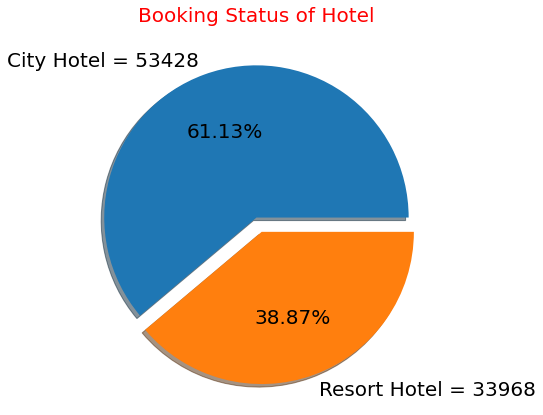

In [ ]:
# Displaying distribution of hotels
total_booking = df1.groupby('hotel')['hotel'].count()
myexplode = [0,0.1]
mylabels = ['City Hotel = 53428', 'Resort Hotel = 33968']
fig = plt.figure(figsize =(7, 7))
plt.title(label='Booking Status of Hotel',fontsize=20, color='red')
plt.pie(total_booking, explode = myexplode, labels = mylabels, shadow = True, autopct='%1.2f%%', textprops={'fontsize': 20})
plt.show() 

Ans) According to our observation, City Hotel has more distribution as compared to Resort Hotel. 

## Distribution between Booking and Cancellation for City Hotel:

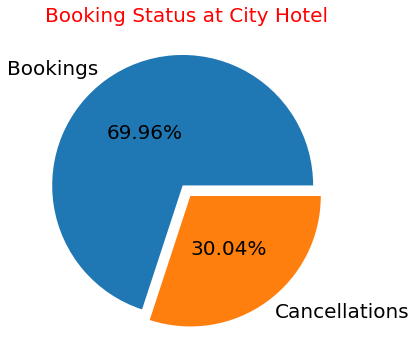

In [ ]:
# Creating a pie chart to display distibution between Booking and Cancellation for City Hotel

resort_hotel = pd.DataFrame(df1[df1['hotel']== 'City Hotel'])
plt.figure(figsize=((6,6)))
plt.title(label='Booking Status at City Hotel',fontsize=20, color='red')
plt.pie(resort_hotel.is_canceled.value_counts(), labels=['Bookings','Cancellations'],explode=[0.05]*2, autopct='%1.2f%%', pctdistance=0.5, textprops={'fontsize': 20})
plt.show()

## Distribution between Booking and Cancellation for Resort Hotel:

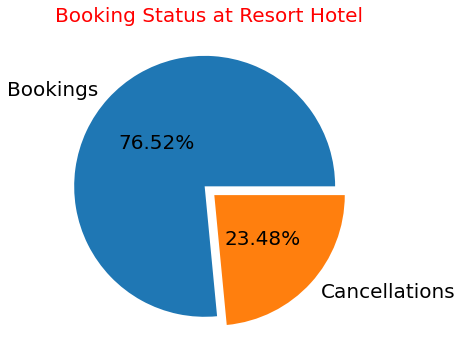

In [ ]:
# Creating a pie chart to display distibution between Booking and Cancellation for Resort Hotel

resort_hotel = pd.DataFrame(df1[df1['hotel']== 'Resort Hotel'])
plt.figure(figsize=((6,6)))
plt.title(label='Booking Status at Resort Hotel',fontsize=20, color='red')
plt.pie(resort_hotel.is_canceled.value_counts(), labels=['Bookings','Cancellations'],explode=[0.05]*2, autopct='%1.2f%%', pctdistance=0.5, textprops={'fontsize': 20})
plt.show()

## According to our observation in the above two pie charts, the cancellation rate in City hotels is much more than in Resort hotels.

### **Basic Data Analysis on Bookings**

## We will begin by getting an idea about how each of the Resort hotel and City hotel has performed for the given three years:

<function matplotlib.pyplot.show(*args, **kw)>

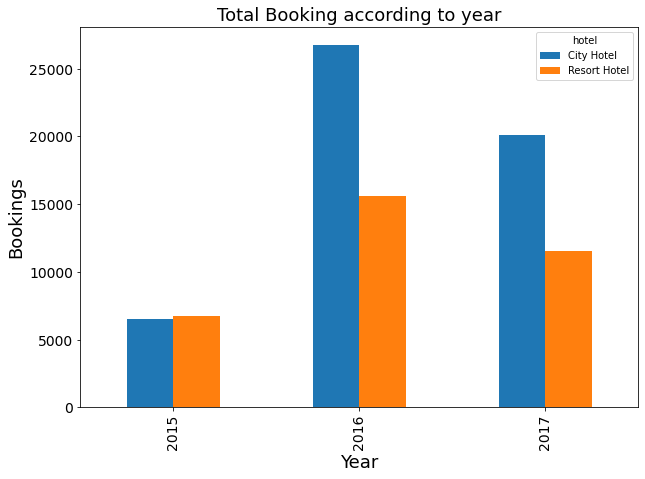

In [ ]:
# Creating a bar chart to show number of bookings in the given 3 years
booking = df1.groupby(['arrival_date_year','hotel'])['arrival_date_year'].count().unstack()

booking.plot.bar(figsize = (10,7),fontsize = 14)

plt.title('Total Booking according to year', fontsize = 18)
plt.ylabel('Bookings', fontsize = 18)
plt.xlabel('Year', fontsize = 18)
plt.show

### Let us find out the busiest month across the years, which gives us an idea that which month is the most preferred for customers:

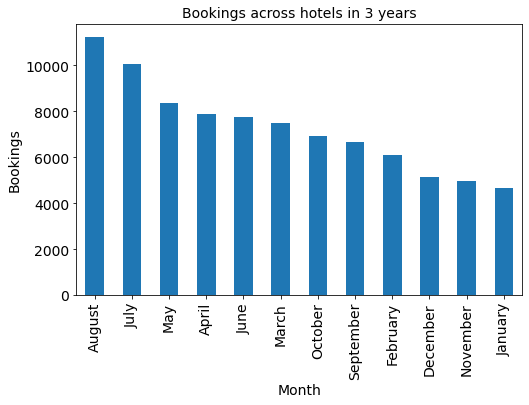

In [ ]:
# Creating a bar chart to show number of bookings taken place each month in the given 3 years
busiest_month = df1['arrival_date_month'].value_counts()

busiest_month.plot.bar(figsize = (8,5),fontsize = 14)
plt.title('Bookings across hotels in 3 years',fontsize = 14 )
plt.ylabel('Bookings', fontsize = 14)
plt.xlabel('Month', fontsize = 14)
plt.show()

## According to our obsrvation, in the three given years, August month is most preferred by customers and January is the least one.

## Let us analyse each year individually:

For the year 2015

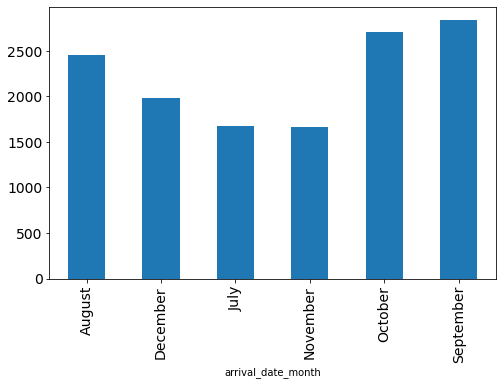

In [ ]:
# Creating bar chart for the 2015 year
year1 = df1[df1['arrival_date_year']==2015]
hotel_month = year1.groupby(['arrival_date_month']).size()
hotel_month.plot.bar(figsize = (8,5),fontsize = 14)


For the year 2015, only 6 months data is available in which September is the most preferred month by customers

For the year 2016

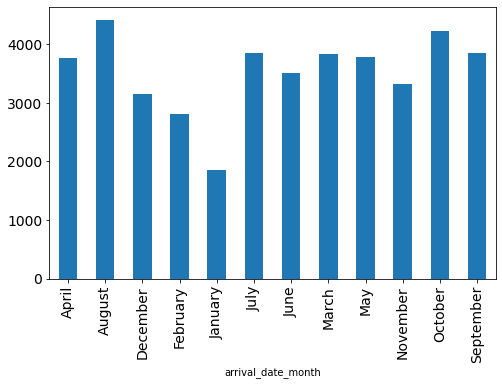

In [ ]:
# Creating bar chart for the 2016 year

year2 = df1[df1['arrival_date_year']==2016]
hotel_month = year2.groupby(['arrival_date_month']).size()
hotel_month.plot.bar(figsize = (8,5),fontsize = 14)

For the year 2016, August is the most preferred month by customers and January is the least one.

For the year 2017

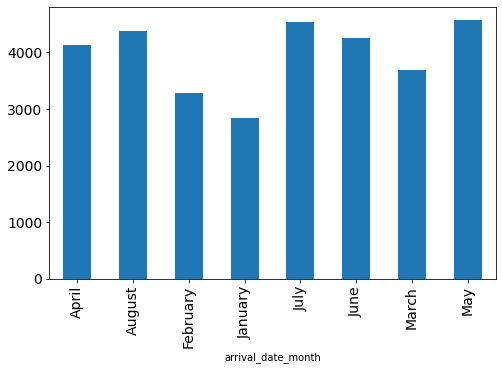

In [ ]:
# Creating bar chart for the 2017 year
year3 = df1[df1['arrival_date_year']==2017]
hotel_month = year3.groupby(['arrival_date_month']).size()
hotel_month.plot.bar(figsize = (8,5),fontsize = 14)

For the year 2017, only 8 months data is available in which May is the most preferred month by customers.

## Analyzing which hotel is more preferred each month in the given 3 years:

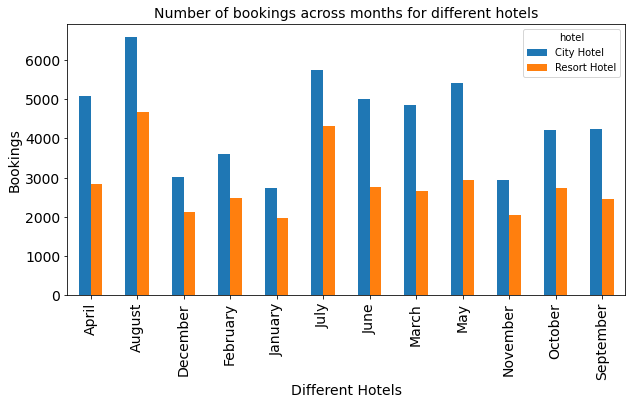

In [ ]:
# We used groupby function to create bar chart for number of bookings in each month for the two hotels City hotel and Resort hotel 
hotel_month = df1.groupby(['arrival_date_month','hotel']).size().unstack()

hotel_month.plot.bar(figsize = (10,5),fontsize = 14)

plt.title('Number of bookings across months for different hotels', fontsize = 14)
plt.ylabel('Bookings', fontsize = 14)
plt.xlabel('Different Hotels', fontsize = 14)
plt.show()

### According to our observation, City hotel and Resort Hotel both had the highest number of bookings in the month of August and City hotel had more bookings as compared to Resort Hotel throughout all months.

## Number of bookings through each distribution channel:

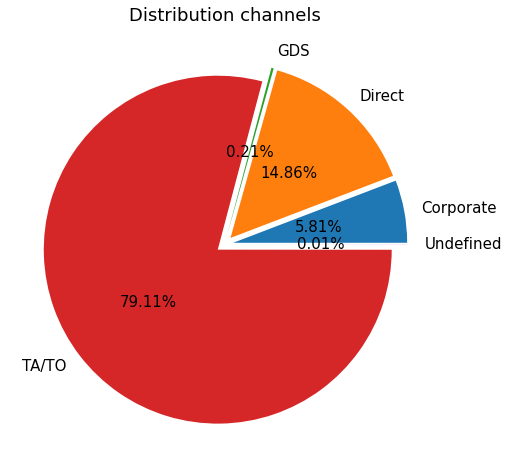

In [ ]:
# We used groupby function to create a pie chart showing the number of bookings taken place through different channels
d1 = pd.DataFrame(round((df1.groupby('distribution_channel').size()/df1.shape[0])*100,2)).reset_index().rename(columns = {0: 'Booking_%'})
plt.figure(figsize = (8,8))
data = d1['Booking_%']
labels = d1['distribution_channel']
plt.pie(x=data, autopct="%.2f%%", explode=[0.05]*5, labels=labels, pctdistance=0.5, textprops={'fontsize': 15})
plt.title("Distribution channels", fontsize=18);

### According to our observation, most bookings have taken place through the TA/TO (Travel Agents/ Tour Operators) distribution channel

### Analyzing number of bookings according to each market segment

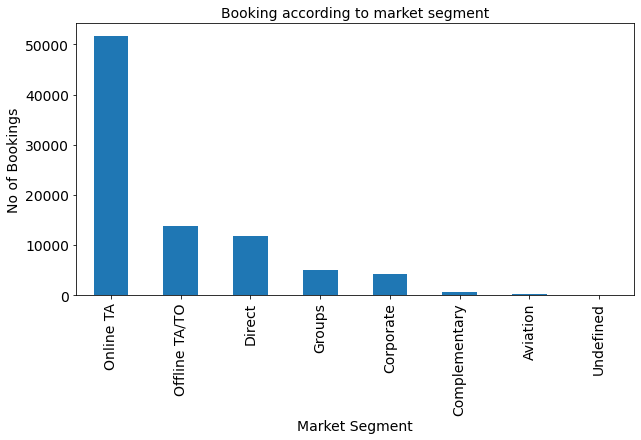

In [ ]:
# We have used value_counts function to show bar graph between number of bookings and each market segment
channel = df1['market_segment'].value_counts()
channel.plot.bar(figsize = (10,5),fontsize = 14)
plt.title('Booking according to market segment',fontsize = 14)
plt.ylabel('No of Bookings',fontsize = 14)
plt.xlabel('Market Segment',fontsize = 14)
plt.show()

### We observe that most number of bookings are through online TA (travel agents) among all market segments

# Analyzing Booking cancellation 

### By country:

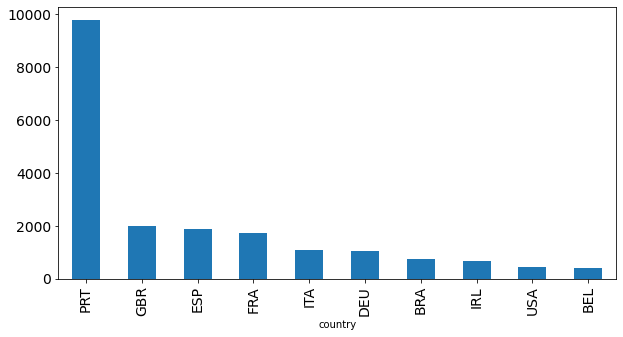

In [ ]:
# We have used groupby function to show number of booking cancellations by each country
cancellation_data = df1.groupby('country')['is_canceled'].sum().sort_values(ascending = False).head(10)
cancellation_data.plot.bar(figsize = (10,5),fontsize = 14)

### PRT has the most number of booking cancellations according to the dataset

### Assumption: The cancellation rate must be higher incase the customer didn't get the room for which they reserved.

In [ ]:
# Analysing the occurence when the reserved room type is not assigned to the guest
assign_room_different = df1[df1['reserved_room_type'] != df1['assigned_room_type']]

assign_room_different = assign_room_different.drop(columns=['lead_time',	'arrival_date_year',	'arrival_date_month',	'arrival_date_week_number','arrival_date_day_of_month',
  'stays_in_weekend_nights','stays_in_week_nights',	'adults', 'children',	'babies',	'meal',	'country',	'market_segment','distribution_channel','is_repeated_guest',
  'previous_cancellations',	'previous_bookings_not_canceled'])

assign_room_different.head(2)

,hotel,is_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total stay
2,Resort Hotel,0,A,C,0,No Deposit,0,0,0,Transient,75.0,0,0,Check-Out,2015-07-02,1
12,Resort Hotel,0,D,E,0,No Deposit,240,0,0,Transient,97.0,0,3,Check-Out,2015-07-05,4


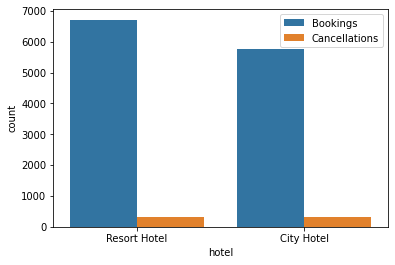

In [ ]:
# Created count plot for the bookings and cancellations of both the hotels 
boo_can = sns.countplot(data=assign_room_different, x='hotel', hue='is_canceled')
boo_can.legend(['Bookings','Cancellations'])

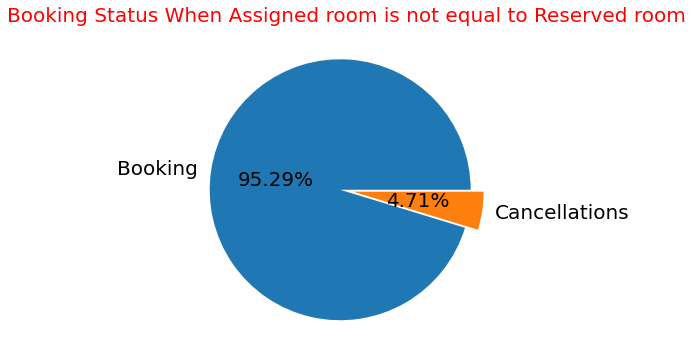

In [ ]:
# Created pie chart to analyse Cancellation when Assigned room is not equal to Reserved room
plt.figure(figsize=((6,6)))
plt.title(label='Booking Status When Assigned room is not equal to Reserved room',fontsize=20, color='red')
plt.pie(assign_room_different.is_canceled.value_counts(), labels=['Booking','Cancellations'], explode=[0.05]*2, autopct='%1.2f%%', pctdistance=0.5, textprops={'fontsize': 20})
plt.show()

### We observed that when reserved room is not assigned to the guest then the cancellation is only 4.71%

In [ ]:
# Analysing the occurence when reserved room type is assigned to the guest
assign_room_same = df1[df1['reserved_room_type'] == df1['assigned_room_type']]

assign_room_same = assign_room_same.drop(columns=['lead_time',	'arrival_date_year',	'arrival_date_month',	'arrival_date_week_number',\
                        'arrival_date_day_of_month',	'stays_in_weekend_nights','stays_in_week_nights',	'adults',\
                        'children',	'babies',	'meal',	'country',	'market_segment','distribution_channel',\
                        'is_repeated_guest',	'previous_cancellations',	'previous_bookings_not_canceled'])
assign_room_same.head(2)


,hotel,is_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total stay
0,Resort Hotel,0,C,C,3,No Deposit,0,0,0,Transient,0.0,0,0,Check-Out,2015-07-01,0
1,Resort Hotel,0,C,C,4,No Deposit,0,0,0,Transient,0.0,0,0,Check-Out,2015-07-01,0


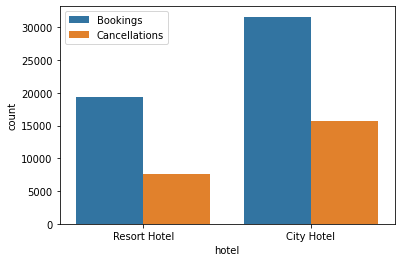

In [ ]:
# Created count plot for the bookings and cancellations of both the hotels 
boo_can = sns.countplot(data=assign_room_same, x='hotel', hue='is_canceled')
boo_can.legend(['Bookings','Cancellations'])

### The Cancellation percentage of City Hotel are quite large as compared to the Resort Hotel Cancellations.

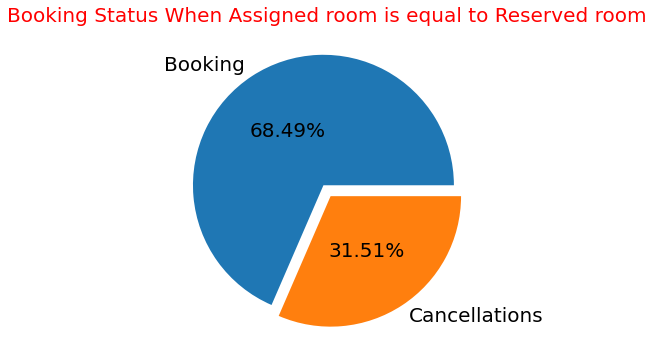

In [ ]:
# Created pie chart to analyse Cancellation when Assigned room is equal to Reserved room
plt.figure(figsize=((6,6)))
plt.title(label='Booking Status When Assigned room is equal to Reserved room',fontsize=20, color='red')
plt.pie(assign_room_same.is_canceled.value_counts(), labels=['Booking','Cancellations'], explode=[0.05]*2, autopct='%1.2f%%', pctdistance=0.5, textprops={'fontsize': 20})
plt.show()

### We observed that when reserved room is assigned to the guest then the cancellation is 31.51%


## We conclude that our assumption is wrong, that the cancellation would be high when reserved room type is not assigned to the guest. However, the scenario is opposite and cancellation is high when the reserved room type is equal to the assigned room type.

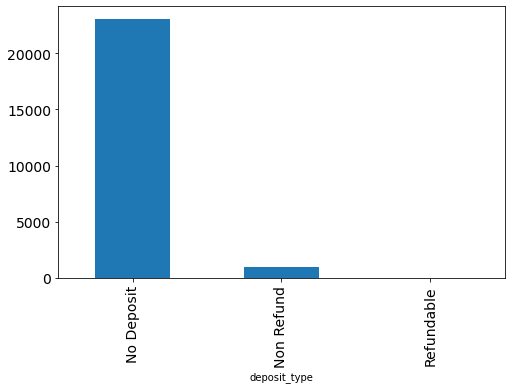

In [ ]:
# We used groupby function to create a bar graph for the deposit type and the number of booking cancel
Deposit_type = df1[df1['is_canceled']==1]
Comparision = Deposit_type.groupby(['deposit_type']).size()
Comparision.plot.bar(figsize = (8,5),fontsize = 14)
plt.show()

### Observations: Number of booking cancelations is the highest when the 'deposit_type' is 'No Deposit'

# Finding the optimal length of stay to get best adr (average daily rate)

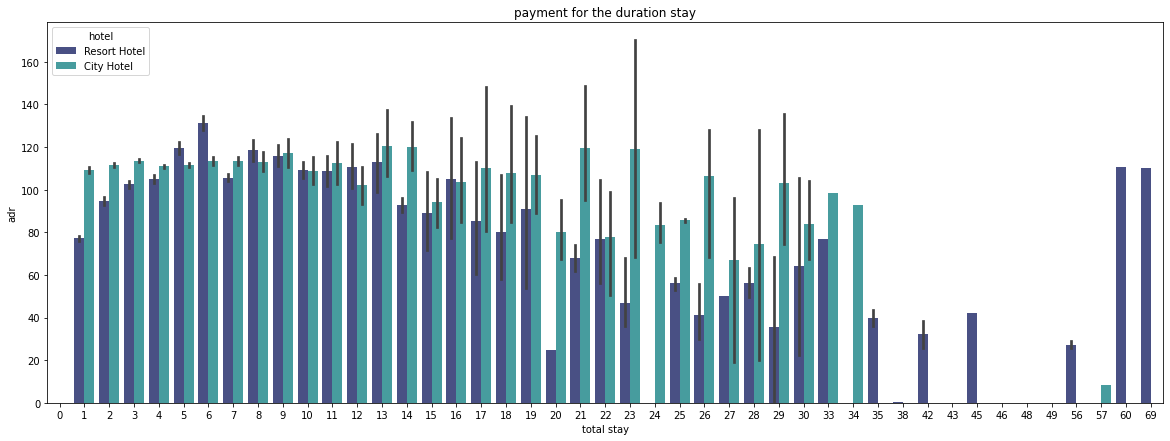

In [ ]:
# We created a bar chart between the column 'total stay' that we had created earlier and the 'adr' column
plt.figure(figsize=((20,7)))
sns.barplot(x='total stay', y='adr',hue='hotel', data=df1, palette='mako')
plt.title('payment for the duration stay')
plt.xlabel('total stay')
plt.ylabel('adr')
plt.show()

### A) We observe that with the increasing length of stay we get better adr. In the above chart we can see that we get best adr between the duration of 35 to 57 days.

### B) It has been observed that the adr of city hotel have not fluctuated much as compared to resort hotel. 

### C) As compared, the best deal(as adr) has been observed in the case of resort hotel when someone choose to stay in between 20-56 days

# Multivariate Analysis on Distribution Channels, Across Months.

## Hypothesis 2: Average monthly ADR generated by ‘Direct’ distribution channel would be the highest across all months since distribution channels such as ‘Corporate’, ‘TA/TO’ and ‘GDS’ rely on discounted pricing.

In [ ]:
# We used groupby function to group together the arrival_date_month & distribution_channel
# we have taken the mean of adr to perform the below test
adr1 = df1.groupby(['arrival_date_month','distribution_channel'])['adr'].mean().unstack()

## Test 1: Studying variation of average monthly ADR generated by each distribution channel across all months, plotted on a scatter plot with trend lines.

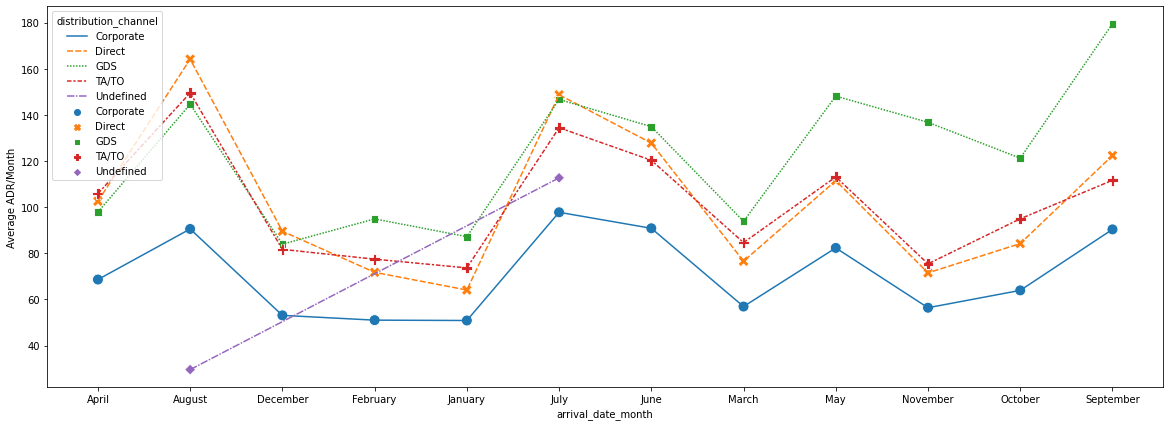

In [ ]:
# We created scatterplot chart along with line chart 
plt.rcParams['figure.figsize'] = (20,7)
graph = sns.scatterplot(data = adr1,s=120)
dat = sns.lineplot(data = adr1)
dat.set(ylabel='Average ADR/Month')
plt.show()

## Analysis:
A) AM-ADR generated from ‘Direct’ channel doesn’t remain the highest across all months.

B) For the months of February and January, it is taken over by AM-ADR generated by ‘GDS’ and ‘TA/TO’.

C) For the months of June, March, May, November, October and September AM-ADR from ‘GDS’ remains higher than ‘Direct’ channel.

D) AM-ADR for ‘Direct’ channel remain almost equal to the AM-ADR generated by ‘TA/TO’. But for the month of September, AM-ADR from ‘Direct’ channels exceeds AM-ADR generated from ‘TA/TO’ channel

## Conclusion:
### The hypothesis is only partially true. ‘Direct’, ‘GDS’ and ‘TA/TO’ channels deliver highest AM-ADR across all the months.

## Hypothesis 3: ‘Corporate’ distribution channel should consistently deliver most number of repeated guests per month, since business related affairs are recurring in nature.

In [ ]:
# We used groupby function to group together the arrival_date_month & distribution_channel
# we have taken the sum of is_repeated_guest to perform the below test
Rep_guests = df1.groupby(['arrival_date_month','distribution_channel'])['is_repeated_guest'].sum().unstack()

### Test 2: Studying variations in number of repeated guests delivered by each distribution channel across all months, plotted on a scatter plot with trend lines.

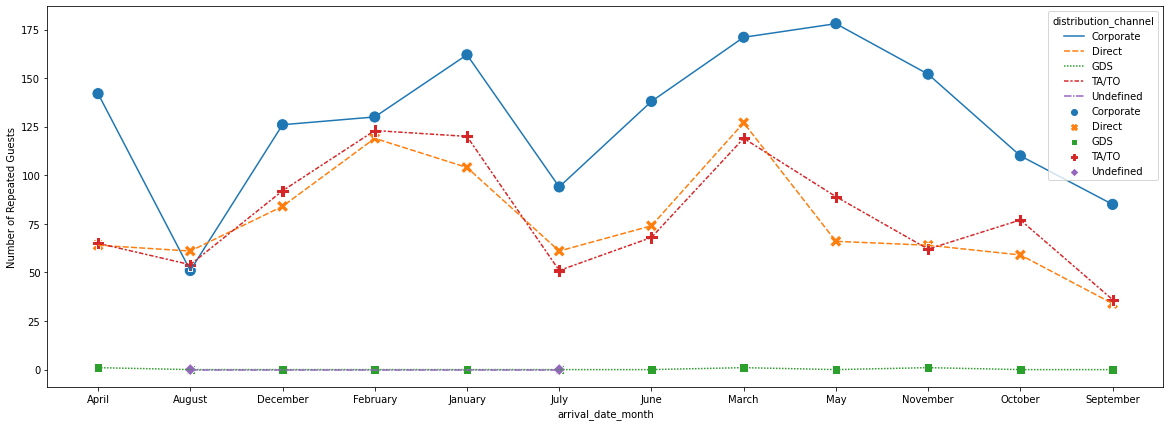

In [ ]:
# We created scatterplot chart along with line chart 
graph = sns.scatterplot(data = Rep_guests,s=150)
dat = sns.lineplot(data = Rep_guests)
dat.set(ylabel='Number of Repeated Guests')
plt.show()

##Analysis:

A) Number of repeated guests, remains highest for ‘Corporate’ distribution channel for most of the months. 

B) For the months of August the number of repeated guests delivered by 'Direct' channel is highest and exceeds the number of repeated guests delivered by ‘Corporate’ channel

## conclusion:

### The hypothesis is partially true. ‘Corporate’ distribution channel sends the most number of repeated guests for all months except August month

## Analysing special requests

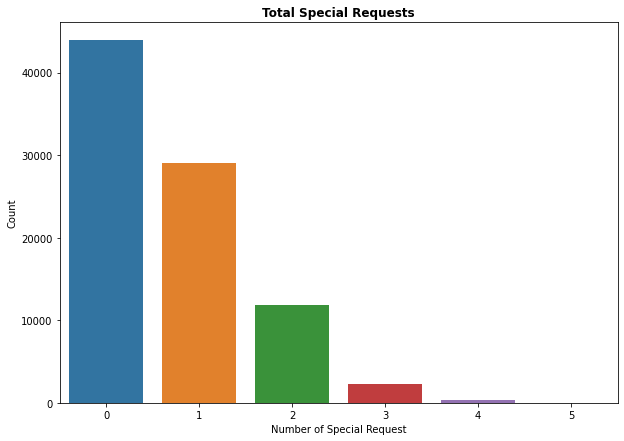

In [ ]:
# We created countplot to display count of number of special requests
plt.figure(figsize = (10,7))
sns.countplot(x='total_of_special_requests', data=df1)
plt.title('Total Special Requests', weight='bold')
plt.xlabel('Number of Special Request')
plt.ylabel('Count')
plt.show()

### We observe that most customer do not make any special request

## Hypothesis 4: Guests delivered by ‘TA/TO’ channel should make the highest special requests, consistently across all months, since agents and operators sell holiday packages which can change as per customer’s conveniences.

In [ ]:
# We used groupby function to group together the arrival_date_month & distribution_channel
# we have taken the sum of total_of_special_requests to perform the below test
Spec_request = df1.groupby(['arrival_date_month','distribution_channel'])['total_of_special_requests'].sum().unstack()

### Test 3: Studying variations in number of special requests for each distribution across months, plotted on a scatter plot with trend line.

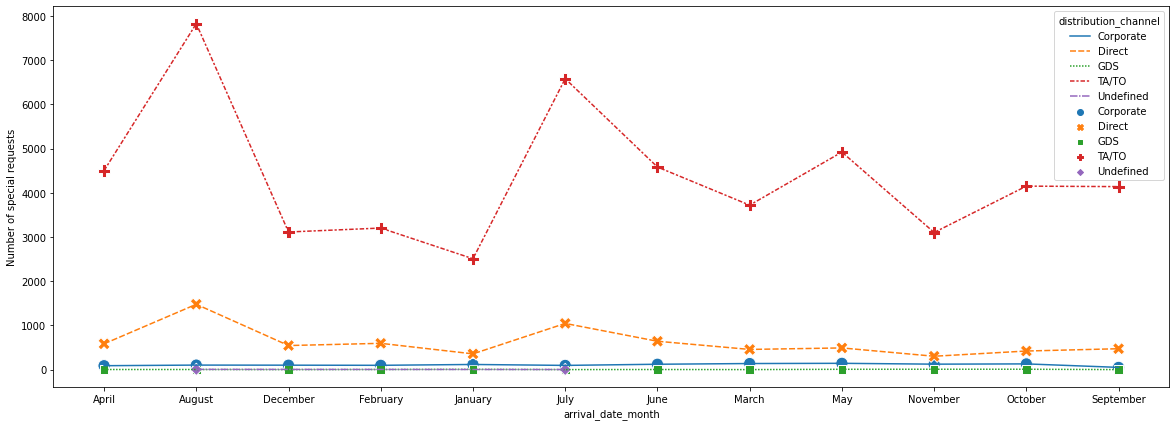

In [ ]:
# We created scatterplot chart along with line chart 
graph = sns.scatterplot(data = Spec_request,s=150)
dat = sns.lineplot(data = Spec_request)
dat.set(ylabel='Number of special requests')
plt.show()

##Analysis: 
A) Guests, delivered through agents and operators, consistently make the highest special requests across all months.

B) Guests, delivered through ‘Direct’ channel, consistently make the second-highest number of special requests across all months


## As observed, the hypothesis is correct

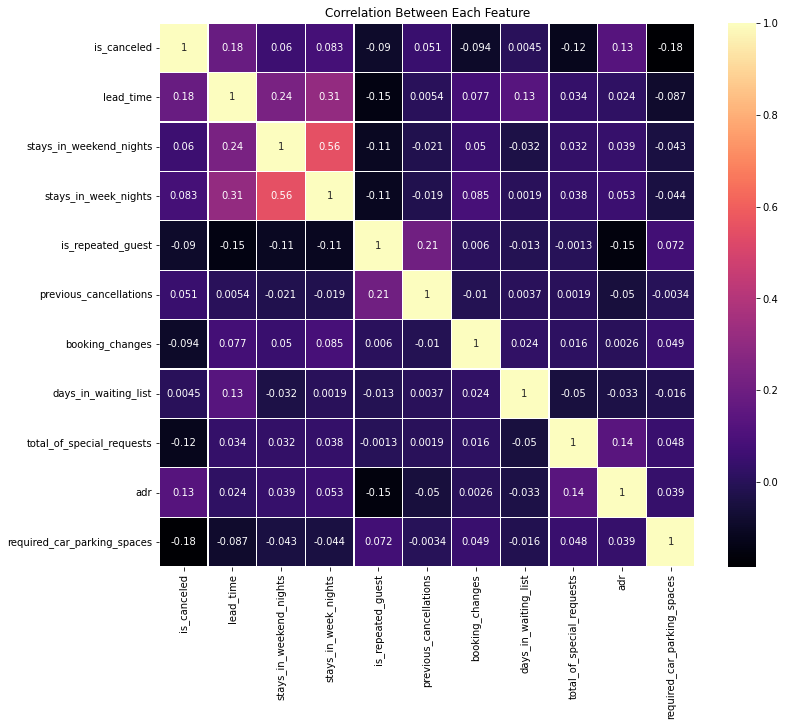

In [ ]:
# we created a heatmap to display correlation between all the columns with the number values
co_releation = pd.DataFrame(df1.loc[:, ['is_canceled', 'lead_time','stays_in_weekend_nights', 'stays_in_week_nights', 'is_repeated_guest',\
                                 'previous_cancellations', 'booking_changes', 'days_in_waiting_list', 'total_of_special_requests',\
                                 'adr', 'required_car_parking_spaces' ]])
fig, ax = plt.subplots(figsize = (12, 10))
sns.heatmap(co_releation.corr(), cmap ='magma', linewidths = 0.30, annot=True )
plt.title("Correlation Between Each Feature")
plt.show()

## Upon Observing the above heat map, we observe the following things:-

A) stays_in_week_nights is the only variable that has some significant level of positive correlation with stays_in_weekend_nights feature

B) required_car_parking_spaces has the most negative correlation with is_canceled feature

## Comparing number of adults with number of bookings in both the hotels

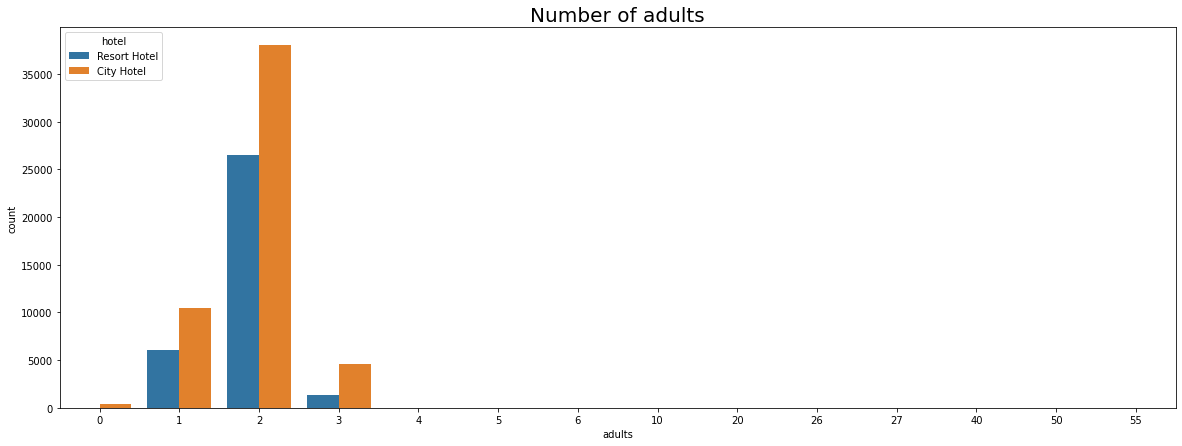

In [ ]:
# we created the countplot to observe no of bookings with number of adults
sns.countplot(data = df1, x = 'adults', hue = 'hotel').set_title("Number of adults", fontsize = 20)
plt.show()

### According to our observation most number of bookings are made by 2 adults followed by 1 adult

## Analysing number of days stayed with number of bookings

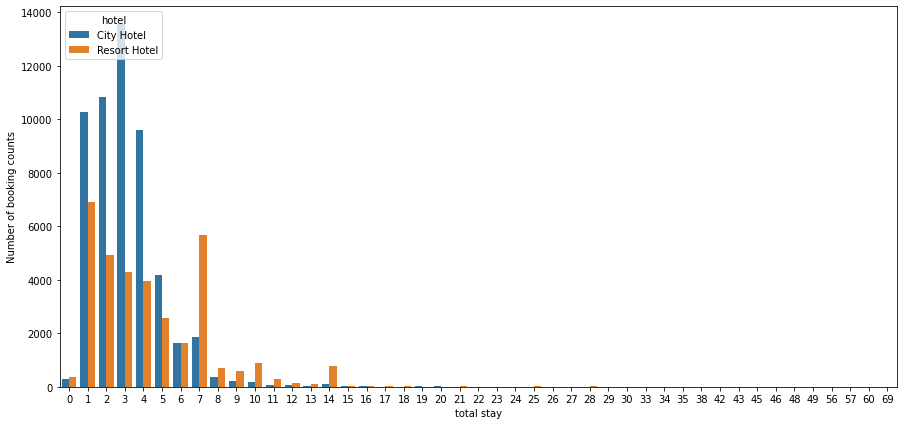

In [ ]:
# We used groupby function to display the no of days stayed and no of bookings in both the hotels
stay = df1.groupby(['total stay', 'hotel']).agg('count').reset_index()
stay = stay.rename(columns={'is_canceled':'Number of booking counts'})
plt.figure(figsize = (15,7))
sns.barplot(x = 'total stay', y = 'Number of booking counts',data= stay,hue='hotel')
plt.show()

### Most people prefer to stay at the hotels of <6 days.

# Conclusion of our EDA:-

* City hotel has more number of booking as compare to resort hotel
* According to the 3 year data, the most preferred month to book a hotel room is August for all customers.
* We observe that most customer do not have any special requests. Also according to the given data most of the special requests are given through distrubtion channel TA/TO and Direct.
* We conclude that most number of cancelations occur when the deposit type is No Deposit.
* The best average daily rate is observed in resort hotel rather than city hotel when the optimal length of stay increases and also it is observed that the daily rate do not vary much in city hotel.
* Most people prefer to stay at the hotels between 1 to 6 days.






